<a href="https://colab.research.google.com/github/Mashael0x/Intro_Machine_Learning/blob/main/05_assignment_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Assignment

Note: target variable is `total_amount`.


1. Load in a sample of the NYC taxi dataset through this parquet link: `https://github.com/gumdropsteve/datasets/raw/master/nyc_taxi/yellow_tripdata_2019-12.parquet`

In [ ]:
import pandas as pd

data = pd.read_parquet('https://github.com/gumdropsteve/datasets/raw/master/nyc_taxi/yellow_tripdata_2019-12.parquet')

2. Find out some information about the data...

In [ ]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2019-12-21 07:55:21,2019-12-21 08:00:18,1.0,1.20,1.0,N,148,4,2.0,6.5,2.5,0.5,0.00,0.0,0.3,9.80,2.5
1,1.0,2019-12-08 13:20:45,2019-12-08 13:28:32,1.0,1.10,1.0,N,113,90,1.0,7.0,2.5,0.5,3.00,0.0,0.3,13.30,2.5
2,2.0,2019-12-28 14:41:40,2019-12-28 14:52:29,1.0,1.12,1.0,N,186,137,2.0,8.0,0.0,0.5,0.00,0.0,0.3,11.30,2.5
3,2.0,2019-12-05 23:42:35,2019-12-05 23:59:18,2.0,3.80,1.0,N,230,263,1.0,14.5,0.5,0.5,3.66,0.0,0.3,21.96,2.5
4,1.0,2019-12-13 12:30:25,2019-12-13 12:45:04,2.0,2.10,1.0,N,162,239,1.0,11.5,2.5,0.5,3.00,0.0,0.3,17.80,2.5


In [ ]:
data.shape

(482742, 18)

3. Show me the relationships in your data... 
- corr ([help](https://stackoverflow.com/a/50703596/11074111))
- pariplot
- some other visualization(s) (of your choice)

In [ ]:
data.corr()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
VendorID,1.000000,0.165798,0.025826,0.009225,-0.006963,-0.002515,-0.012707,-0.001725,-0.858735,-0.028355,0.021642,0.010144,-0.039408,-0.001597,-0.009748
passenger_count,0.165798,1.000000,0.019496,0.000271,-0.006724,-0.004947,0.016564,-0.000294,-0.135692,0.002063,0.000780,0.012475,0.003783,-0.000227,0.013716
trip_distance,0.025826,0.019496,1.000000,0.144107,-0.094794,-0.107132,-0.020566,0.017491,0.001632,-0.085268,0.506991,0.615388,0.018388,0.021689,-0.210402
RatecodeID,0.009225,0.000271,0.144107,1.000000,-0.008881,0.002503,0.006139,0.004868,-0.022093,-0.181959,0.133305,0.155296,-0.039509,0.005854,-0.094704
PULocationID,-0.006963,-0.006724,-0.094794,-0.008881,1.000000,0.107039,-0.028173,-0.000217,0.015927,0.010784,-0.027828,-0.049324,0.002824,-0.000370,0.127982
DOLocationID,-0.002515,-0.004947,-0.107132,0.002503,0.107039,1.000000,-0.029818,-0.000392,0.014882,0.028633,-0.034075,-0.065728,-0.000009,-0.000616,0.129009
payment_type,-0.012707,0.016564,-0.020566,0.006139,-0.028173,-0.029818,1.000000,0.006944,-0.021476,-0.178163,-0.484442,-0.033897,-0.221938,0.004156,-0.175131
fare_amount,-0.001725,-0.000294,0.017491,0.004868,-0.000217,-0.000392,0.006944,1.000000,0.001580,-0.006006,0.010816,0.012652,-0.010373,0.999976,-0.004353
extra,-0.858735,-0.135692,0.001632,-0.022093,0.015927,0.014882,-0.021476,0.001580,1.000000,0.063720,0.002841,0.002643,0.064156,0.002209,0.147109
mta_tax,-0.028355,0.002063,-0.085268,-0.181959,0.010784,0.028633,-0.178163,-0.006006,0.063720,1.000000,-0.060702,-0.168105,0.744811,-0.006107,0.409854


In [ ]:
import time
import seaborn as sns

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.11 µs


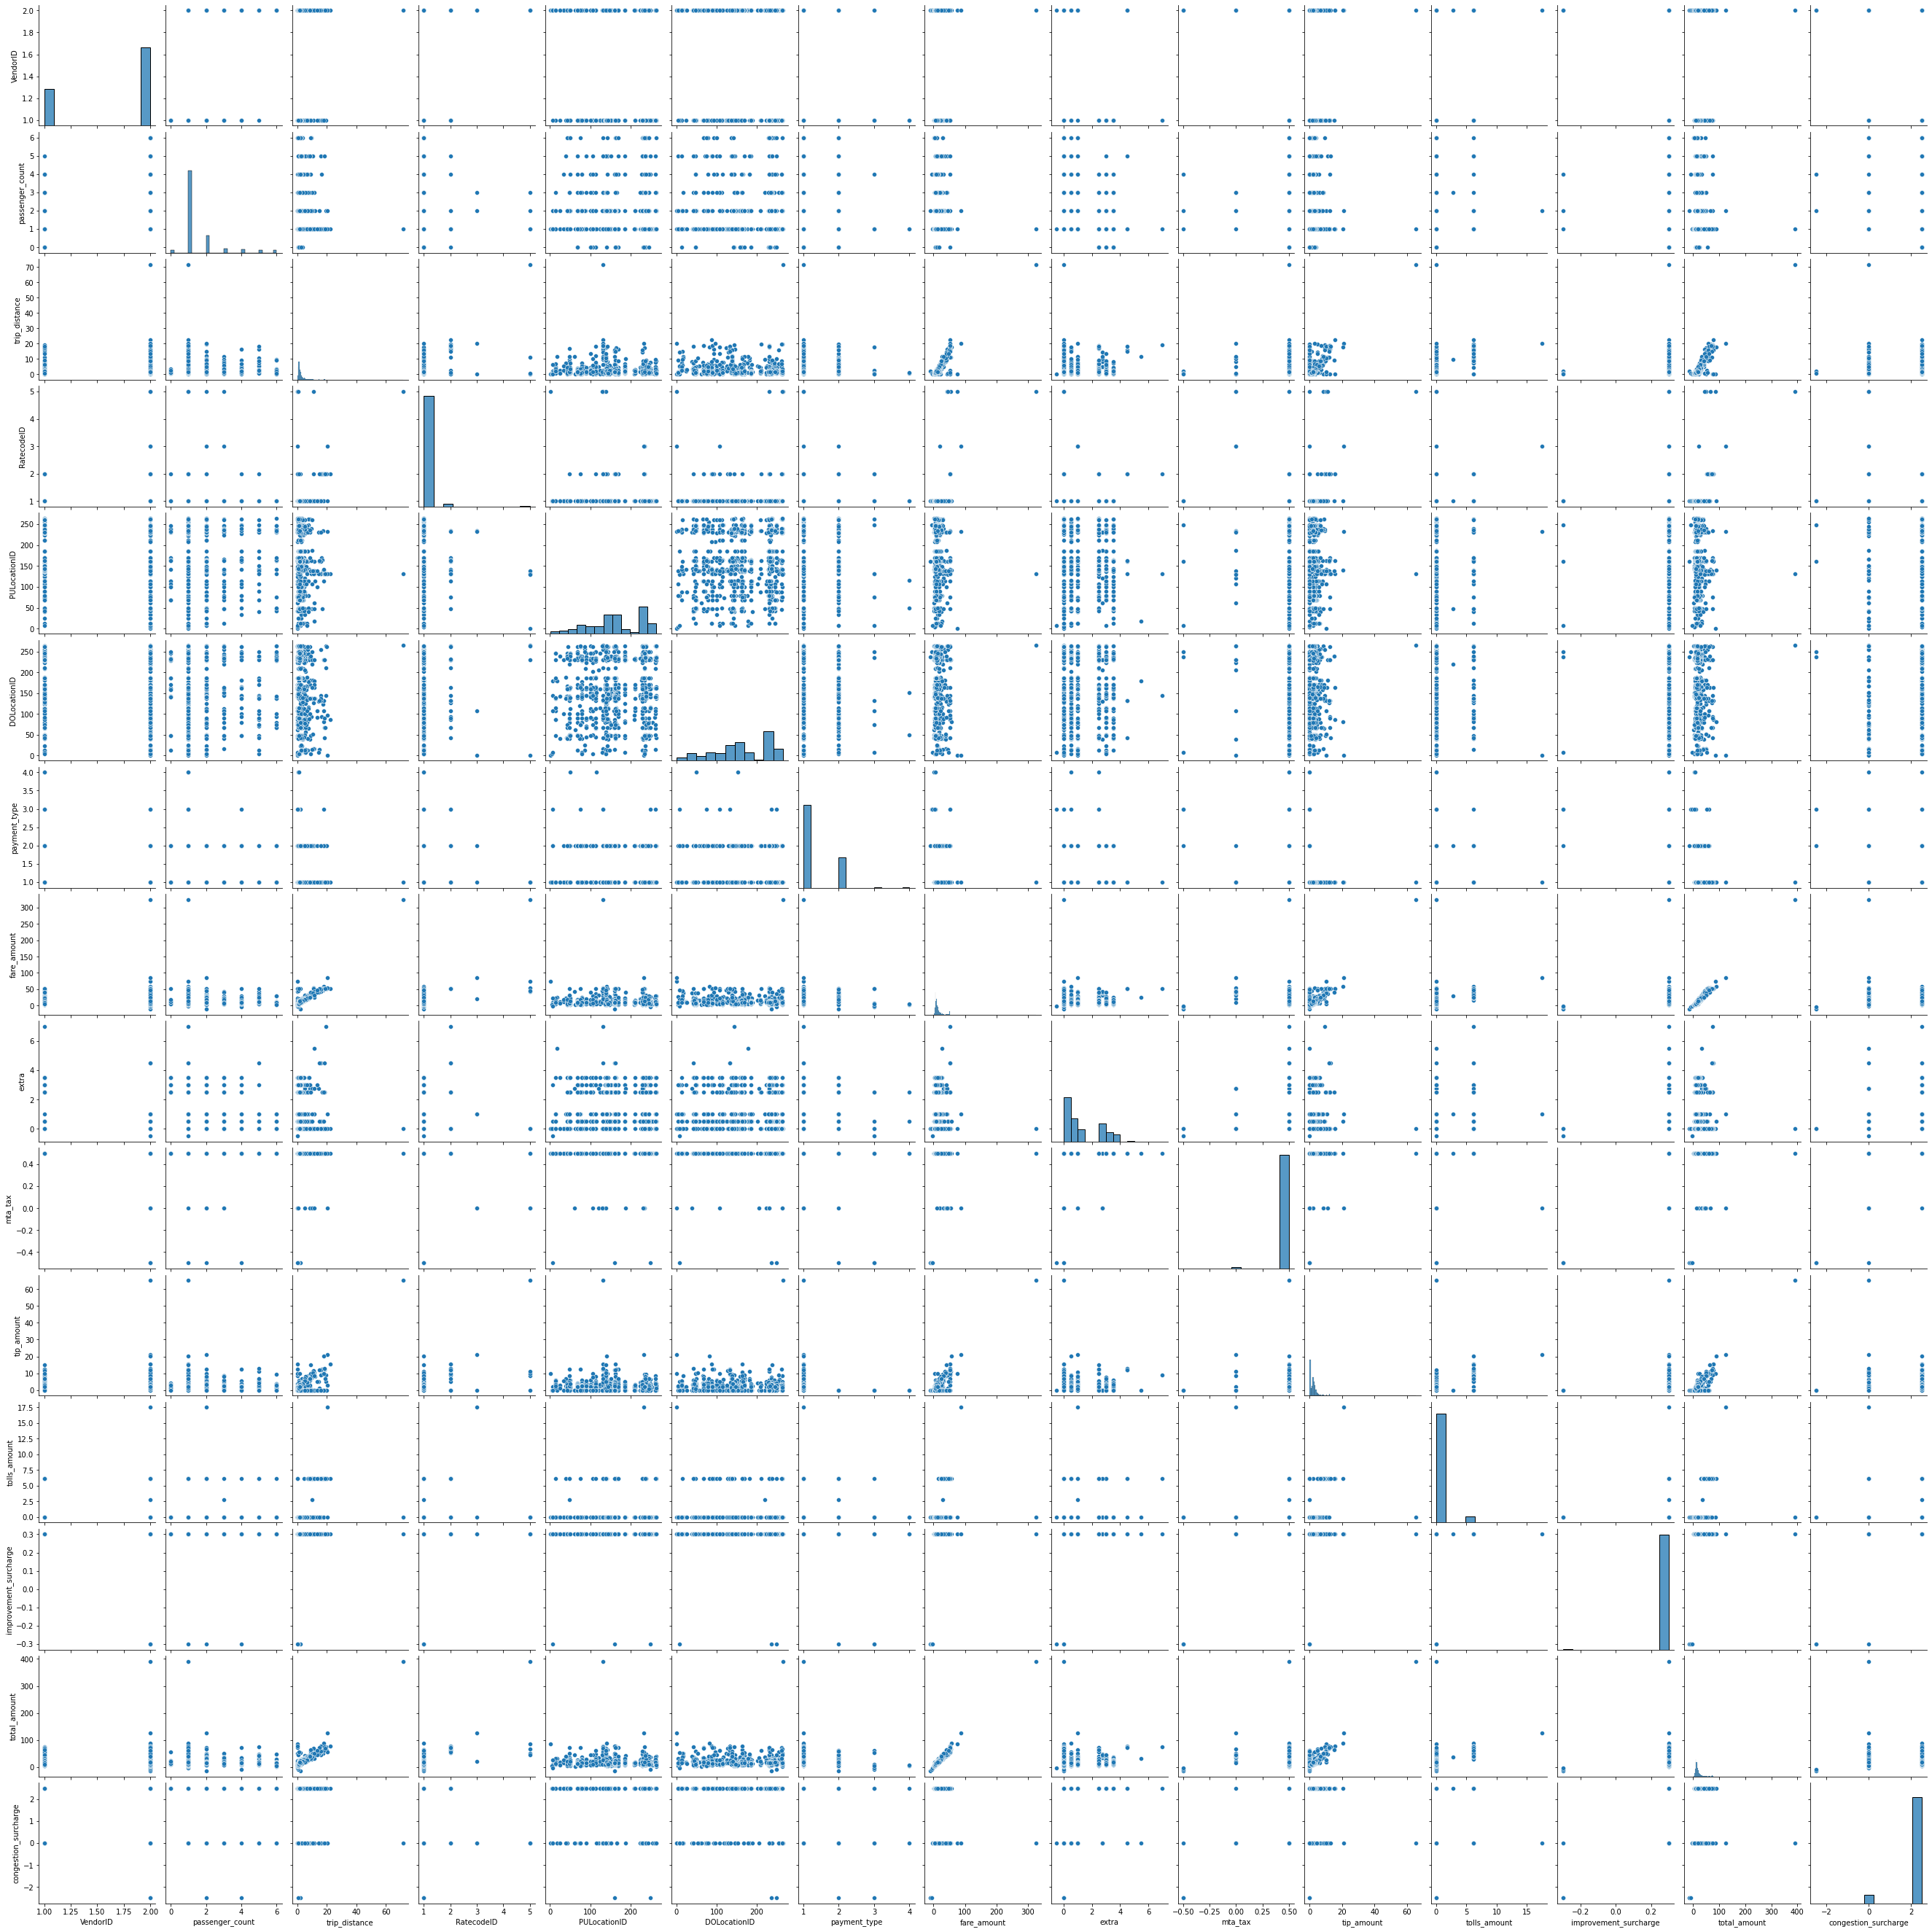

In [ ]:
%time
#it took seabron more than 10 minutes to plot all data so I take a sample
sns.pairplot(data.sample(1000));

4. Split your data into training and testing datasets...

In [ ]:
from sklearn.model_selection import train_test_split

x = data['trip_distance']
y = data.total_amount

x_train, x_test, y_train, y_test = train_test_split(x ,y , train_size = 0.75)

5. Import, create, and fit a LinearRegression model with 1 variable

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(pd.DataFrame(x_train), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr.intercept_

9.735029860251007

In [ ]:
lr.coef_

array([3.31219421])

6. Make predictions on your `X_test` values...

In [ ]:
predictions = lr.predict(pd.DataFrame(x_test))

In [ ]:
# what do they look like? (show me some of the predictions)
predictions[-5:]

array([15.96195498, 14.00776039, 15.0345406 , 11.78859027, 29.2769757 ])

In [ ]:
y_test[-5:]

210932    17.76
133656    11.76
217623    14.75
149464    12.25
320659    27.35
Name: total_amount, dtype: float64

7. Score your model...
- r2_score
- other metric (of your choice...)

In [ ]:
from sklearn.metrics import *

In [ ]:
#accuracy_score(y_test, predictions)

In [ ]:
r2_score(y_test, predictions)

7.353436171797512e-05

In [ ]:
mean_absolute_error(y_test, predictions)

6.986604327669236

8. Create, and fit a LinearRegression model with **more than** 1 variable

In [ ]:
x_multi = data[['trip_distance','fare_amount','tip_amount']]
y = data.total_amount

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_multi, y, train_size = 0.75)

In [ ]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

9. Make predictions on your `X_test` values...

In [ ]:
pred = lr.predict(x_test)

In [ ]:
# what do they look like? (show me some of the predictions)
pred[-5:]

array([11.32905154,  8.0680195 , 14.63514531,  8.59170852, 15.54383303])

In [ ]:
y_test[-5:]

420081    11.33
360039     9.30
281109    14.80
210232     9.80
360064    15.36
Name: total_amount, dtype: float64

10. Score your model...
- r2_score
- other metric (of your choice...)

In [ ]:
r2_score(y_test, pred)

0.9888324904444306

In [ ]:
mean_absolute_error(y_test, pred)

0.8554910441269019

**11. Which model is better? Why?**

the model that uses multiple variables, it makes the model more accurate

12. Perform GridSearchCV with the better data

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()



In [ ]:
from sklearn.model_selection import GridSearchCV

p_grid = {'fit_intercept': [True, False],
          'normalize': [True, False]}

grid = GridSearchCV(lr, p_grid)

grid.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid.best_params_

{'fit_intercept': True, 'normalize': True}

13. Update the hyperparameters of your model (create and fit a new model with the results of GridSerachCV)

In [ ]:
lr = LinearRegression(fit_intercept= True, normalize= True)

In [ ]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
preds = lr.predict(x_test)

In [ ]:
preds[-5:]

array([11.32905154,  8.0680195 , 14.63514531,  8.59170852, 15.54383303])

In [ ]:
y_test[-5:]

420081    11.33
360039     9.30
281109    14.80
210232     9.80
360064    15.36
Name: total_amount, dtype: float64

14. Score the new model... 
- r2_score
- some other metric of your choice

In [ ]:
r2_score(y_test, preds)

0.9888324904444307

In [ ]:
mean_absolute_error(y_test, preds)

0.8554910441269292

**Did the score change at all? Why?**

no it doesn't change...